In [1]:
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from keras import models
import argparse
import random
import time
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from keras import models
model=models.load_model('./garabage224.h5')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from xgboost.sklearn import XGBClassifier

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from collections import defaultdict
from sklearn.externals import joblib
from scipy.special import entr
import glob

C:\Users\ABCD\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
dataset = pd.read_csv('./FinalDatasheet.csv')
print(len(dataset))
print(dataset.head())

800
   Cardboard=0   glass=1    Metal=2  Plastic=3       Paper=4  marginal  \
0    93.690941  0.002436   2.615459   3.691119  4.532490e-05  1.036911   
1     0.095962  0.000020  98.806129   1.097798  8.614760e-05  1.010977   
2    98.608109  0.000618   1.073514   0.317567  1.833860e-04  1.003174   
3     0.696257  0.000014   7.458564  91.845161  1.770490e-07  1.918452   
4    67.259476  0.001402  26.033657   0.603907  6.101556e+00  0.945024   

          Ratio     least   entropy  predicted  erro1/not an error  
0  8.143698e+04  0.078863  0.278402          0                   0  
1  1.274322e+04  0.014923  0.068082          2                   1  
2  1.731680e+03  0.017399  0.080863          0                   0  
3  5.187560e+08  0.101935  0.306326          3                   1  
4  9.897586e-02  0.409257  0.818766          0                   0  


In [6]:
dataset = dataset.drop('Cardboard=0',axis=1)
dataset = dataset.drop('glass=1',axis=1)
dataset = dataset.drop('Metal=2',axis=1)
dataset = dataset.drop('Plastic=3',axis=1)
dataset = dataset.drop('Paper=4',axis=1)

In [7]:
x = dataset.iloc[:,0:5]
y = dataset.iloc[:,5]
data_dmatrix = xgb.DMatrix(data=x,label=y)
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=2, test_size=0.2)

C:\Users\ABCD\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ABCD\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [8]:
x_train = x_train.as_matrix()

C:\Users\ABCD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
xgb_model = xgb.XGBClassifier(learning_rate =0.01,
    n_estimators=500,
    max_depth = 3,
    min_child_weight = 1,
    gamma=0.1,
    subsample=0.45,
    colsample_bytree=0.9,
    reg_alpha=1,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1.3,
    seed=0)

xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.1,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1.3, seed=0,
              silent=None, subsample=0.45, verbosity=1)

Processing image...
Converted RGB image to grayscale...
Resizing image to 28x28 scale...
Resized...
Image saved!
[2]
[2]
(5, 1)
[[1.25743949 3.56677723 0.70190609 1.25546324 2.        ]]
what is this?
3
[0. 0. 1. 0. 0.]
[[0. 0. 1. 0. 0.]]
Epoch 1/20


C:\Users\ABCD\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1/1 [==============================] - 17s 17s/step - loss: 1.3562 - acc: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 449ms/step - loss: 1.1762 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 409ms/step - loss: 0.9270 - acc: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 456ms/step - loss: 0.6613 - acc: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 440ms/step - loss: 0.4319 - acc: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 438ms/step - loss: 0.2603 - acc: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 444ms/step - loss: 0.1464 - acc: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 442ms/step - loss: 0.0781 - acc: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 470ms/step - loss: 0.0403 - acc: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 451ms/step - loss: 0.0205 - acc: 1.0000
Epoch 11/20
1/1 [==============================] - 0s 473ms/step - loss: 0.0105 -

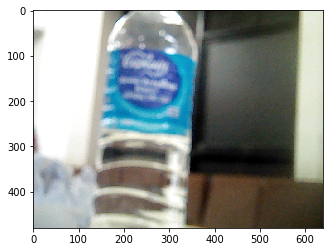

In [12]:
import cv2 

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(1)
while True:
     
    check, frame = webcam.read()
    #print(check) #prints true as long as the webcam is running
    #print(frame) #prints matrix values of each framecd 
    cv2.imshow("Capturing", frame)
    key = cv2.waitKey(1)
    if key == ord('s'): 
        cv2.imwrite(filename='./saved_img.jpg', img=frame)
        webcam.release()
        img_new = cv2.imread('./saved_img.jpg')
        #img_new = cv2.imshow("./Captured Image", img_new)
        cv2.waitKey(1650)
        cv2.destroyAllWindows()
        print("Processing image...")
        img_ = cv2.imread('./saved_img.jpg')
       # print("Converting RGB image to grayscale...")
        #gray = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        print("Converted RGB image to grayscale...")
        print("Resizing image to 28x28 scale...")
        img_ = cv2.resize( img_,(224,224))
        print("Resized...")
        img_resized = cv2.imwrite(filename='./saved_img-final.jpg', img=img_)
        print("Image saved!")
     
        r1= cv2.imread('./saved_img.jpg')
        r=cv2.cvtColor(r1, cv2.COLOR_BGR2RGB)
        #plt.imshow(r)
        #plt.show()
       # plt.clf()
        #
        img = cv2.resize(r,(224,224))
        img_array = np.array(img)

        img_array= img_array.astype('float32')
        img_array=img_array/255.

        X_val = np.array([img_array])
        predicted = model.predict(X_val)
        np.reshape(5, 1)
        order =np.sort(predicted ,axis=0)
        #y_prob = model.predict(x) 
        y_classes = predicted.argmax(axis=-1)
        #p=model.predict_classes(X_val)
        print(y_classes)


        k0=y_classes
        print(k0)
        difference = (order[:,-1] - order[:,-2])
        margin_conf = 1 - difference
        k1=margin_conf

        ratio_conf = order[:,-2] / order[:,-1]
        k2=ratio_conf

        simple_least_conf = np.nanmax(predicted) # most confident prediction, ignoring NaNs
        num_labels = float(predicted.size) # number of labels
        normalized_least_conf = (1 - simple_least_conf) * (num_labels / (num_labels -1))
        k3=np.array([normalized_least_conf])
        entropy=entr(predicted).sum()
        k4=np.array([entropy])
        k5=np.array([k1,k2,k3,k4,k0])
        print(k5.shape)
        #print(k5)
        k6=k5.transpose()
        print(k6)

        #fittedModel1 = joblib.load('SVM1.pkl')
        #print(fittedModel1)

        p=xgb_model.predict(k6) 
        if p==1:
            #cv2_imshow(r)
        #plt.imshow(r)
            #plt.imshow(r)
            #plt.imshow(r)
            #cv2.waitKey()
            #cv2.destroyAllWindows()
            #print("what is this?")
            in1=0
            
            root = Tk()
            root.title("Image Verifer")
            root.geometry("700x500+150+150")
            my_text = Label(root, text='Is This Correctly Classified???')
            my_text.config(font=('times', 30, 'italic bold'))
            my_text.pack(ipady=25)
            im=Image.open("C:/Users/Acer/Desktop/intelli/bottle.jpg")  #This is the correct location and spelling for my image location
            im = im.resize((250,300),Image.ANTIALIAS)
            photo=ImageTk.PhotoImage(im)  
            my_image = Label(root, image=photo, bd=10)
            my_image.pack()
            yesim = Image.open("C:/Users/Acer/Desktop/intelli/yes.png")  #This is the correct location and spelling for my image location
            yesim = yesim.resize((75,75),Image.ANTIALIAS)
            noim = Image.open("C:/Users/Acer/Desktop/intelli/no.png")  #This is the correct location and spelling for my image location
            noim = noim.resize((75,75),Image.ANTIALIAS)
            yesphoto = ImageTk.PhotoImage(yesim) 
            nophoto = ImageTk.PhotoImage(noim)
            label1 = Label(root, image=yesphoto)
            label2 = Label(root, image=nophoto)
            label2.pack(fill=Y, padx=170, ipady=15, side=RIGHT)
            label1.pack(fill=Y, padx=15, ipady=15, side=RIGHT) 

# Bind mouse button 1 click on label
            label1.bind("<Button-1>", lambda e:yes_callback())
            label2.bind("<Button-1>", lambda e:no_callback())
            root.resizable(0,0)
            root.mainloop()
            
            class_N=int(in1)
            #print (class_N)
            from keras.utils import np_utils
            Y = np_utils.to_categorical((class_N-1),5)
            print(Y)
            y_val=np.array([Y])
            print(y_val)
            for layer in model.layers[:-1]:#[n_frozen_layers:]:
              layer.trainable=True
            model = model.fit(X_val, y_val, batch_size=8 , epochs=20, verbose=1)
        break
    elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
def no_callback():
    print('Label was clicked No')
    root.destroy()
    mainframe()
def yes_callback():
    print("The button was clicked Yes")
class mainframe:
    def __init__(root):
        root = Tk()
        root.title("Image Verifer")
        root.geometry("700x500+150+150")
        my_text = Label(root, text='What is this???')
        my_text.config(font=('times', 30, 'italic bold'))
        my_text.pack(ipady=25)
        img =Image.open("C:/Users/Acer/Desktop/intelli/bottle.jpg")  #This is the correct location and spelling for my image location
        img = img.resize((250,300),Image.ANTIALIAS)
        pht=ImageTk.PhotoImage(im)  
        my_img = Label(root, image=pht, bd=10)
        my_img.pack()
        label1 = Label(root, text='Cardboard', background='yellow')
        label2 = Label(root, text='Paper     ', background='orange')
        label3 = Label(root, text='Glass     ', background='lightgreen')
        label4 = Label(root, text='Metal     ', background='lightblue')
        label5 = Label(root, text='Plastic   ', background='pink')

        label1.pack(fill=X, padx=50, ipady=15, side=RIGHT)  # Pack from right to left
        label2.pack(fill=X, padx=25, ipady=15, side=RIGHT)
        label3.pack(fill=X, padx=25, ipady=15, side=RIGHT)  # Pack from right to left
        label4.pack(fill=X, padx=25, ipady=15, side=RIGHT)
        label5.pack(fill=X, padx=25, ipady=15, side=RIGHT)  # Pack from right to left

        label1.bind("<Button-1>", lambda e:pred_callback(1))
        label2.bind("<Button-1>", lambda e:pred_callback(2))
        label3.bind("<Button-1>", lambda e:pred_callback(3))
        label4.bind("<Button-1>", lambda e:pred_callback(4))
        label5.bind("<Button-1>", lambda e:pred_callback(5))
        root.mainloop()
    def pred_callback(x):
        in1 = x
        print(in1)